In [101]:
# No sample adjustment - baseline logistic regression - MinMax tag data


In [102]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [103]:
# module for resampling
from sklearn.utils import resample

In [104]:
# os.getcwd()

In [105]:
# os.listdir(os.getcwd())

In [106]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_binary_tags_merged_nan_removed.csv")
all_param_df.shape


(31686, 357)

In [107]:
# # check for NAN rows
# is_NaN = all_param_df.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# rows_with_NaN = all_param_df[row_has_NaN]
# print(len(rows_with_NaN))

In [108]:
# print(rows_with_NaN)

In [109]:
# all_param_df = all_param_df.dropna()

In [110]:
# len(all_param_df)

In [111]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [112]:
len(y_class)

31686

In [113]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [114]:
x_data.shape

(31686, 346)

In [115]:
#label encode the developer name

In [116]:
x_data['developer']=x_data['developer'].astype('category')

In [117]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18255,Valve,999,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18255,Valve,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,Valve,499,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,Valve,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,Valve,499,90,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
#label encode the publisher name

In [119]:
x_data['publisher']=x_data['publisher'].astype('category')

In [120]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18255,15348,999,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18255,15348,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,15348,499,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,15348,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,15348,499,90,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [122]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [123]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [124]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [125]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

In [126]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.9781181619256017
Testing Data Score: 0.9736177732895733


In [127]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7703
           1       0.60      0.14      0.23       219

    accuracy                           0.97      7922
   macro avg       0.79      0.57      0.61      7922
weighted avg       0.97      0.97      0.97      7922



In [128]:
# thinking about baseline results:
# Support is not balanced - 7703 fail cases vs 219 success
# Percision: for no success: 98%, for successful games: 60%
# Recall: Fraction of positives found, 100% for 0, 14% for 1
# f1 score: 97% due to overfitting on failure cases

<AxesSubplot:>

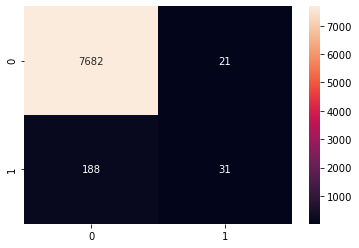

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled )
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [130]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
3,maxprice,2.118548
247,tagmartialarts,1.702464
0,metascore,1.701364
232,tag0ir,1.493532
148,tagepisodic,1.416910
342,tagclicker,1.258750
84,tagbasketball,1.221518
324,tagwordgame,1.204274
51,tagturnbased,0.984019
254,tagfootball,0.976669


In [131]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = clf_1.predict_proba(X_test)
prob_y_2

array([[1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       ...,
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.47960167e-111],
       [3.64303172e-008, 9.99999964e-001]])

In [132]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [133]:
# Print AUROC of SMOTE model
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# It tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
print( roc_auc_score(y_test, prob_y_2) )

0.6167963972999904


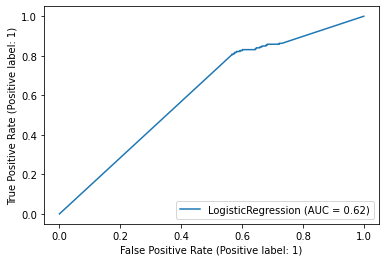

In [134]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_1, X_test, y_test)  
plt.show()